007 Timepoint Analysis

In [17]:
import warnings 
warnings.filterwarnings("ignore",message="The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator")

import matplotlib as mpl
import scanpy as sc 
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import os
from plotnine import *
np.random.seed(13)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

# Ignore cmap/matplotlib color warnings 
warnings.filterwarnings("ignore", message="No data for colormapping provided")
warnings.filterwarnings("ignore", message="The get_cmap function was deprecated in Matplotlib")

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 400
mpl.rcParams['figure.frameon'] = False


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.2 pynndescent==0.5.12


In [18]:
#adata = sc.read_h5ad('/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/marcus_analysis/project_007c/results_pilot_24h_48h__27_02_2024/celltype/adata.h5ad')
adata = sc.read_h5ad('/lustre/scratch126/humgen/projects/sc-eqtl-ibd/analysis/marcus_analysis/organoid_analysis/yascp_analysis/results/celltype/adata.h5ad')

In [19]:
adata.obs['experiment_id'].drop_duplicates(ignore_index = True)

0     6123STDY12147214__donor0
1     6123STDY12147214__donor1
2     6123STDY12147214__donor3
3     6123STDY12147215__donor0
4     6123STDY12147215__donor1
5     6123STDY12147216__donor0
6     6123STDY12147216__donor1
7     6123STDY12147217__donor0
8     6123STDY12147217__donor2
9     6123STDY12147218__donor0
10    6123STDY12147218__donor1
11    6123STDY12472437__donor0
12    6123STDY12472437__donor1
13    6123STDY12472437__donor2
14    6123STDY12472438__donor0
15    6123STDY12472438__donor1
16    6123STDY12472438__donor2
17    6123STDY12472439__donor0
18    6123STDY12472439__donor1
19    6123STDY12472440__donor0
20    6123STDY12472440__donor1
21    6123STDY12472440__donor2
22    6123STDY12472441__donor0
23    6123STDY12472441__donor1
24    6123STDY12472442__donor0
25    6123STDY12472442__donor1
26    6123STDY12472443__donor0
27    6123STDY12472443__donor1
28    6123STDY12472444__donor0
29    6123STDY12472444__donor1
30    6123STDY12472445__donor0
31    6123STDY12472445__donor1
32    61

Map the meta-data together such that we can properly plot

In [20]:
# Create a mapping of experiment IDs to patient IDs
experiment_to_patient_map = {
    'HT_scRNA14564151__donor0': 'patient_1',
    'HT_scRNA14564152__donor2': 'patient_1',
    'HT_scRNA14564151__donor1': 'patient_2',
    'HT_scRNA14564152__donor1': 'patient_2',
    'HT_scRNA14564151__donor2': 'patient_3',
    'HT_scRNA14564152__donor0': 'patient_3',
    'HT_scRNA14564151__donor3': 'patient_4',
    'HT_scRNA14564152__donor4': 'patient_4',
    'HT_scRNA14564151__donor4': 'patient_5',
    'HT_scRNA14564152__donor3': 'patient_5',
    'HT_scRNA14564151__donor5': 'patient_6',
    'HT_scRNA14564152__donor5': 'patient_6',
}

# Map the experiment IDs to patient IDs and create the new column in the AnnData object
adata.obs['patient_ID'] = adata.obs['experiment_id'].map(experiment_to_patient_map)
adata.obs['timepoint'] = adata.obs['convoluted_samplename'].apply(lambda x: 48 if 'HT_scRNA14564151' in x else 24)
adata.obs[['convoluted_samplename', 'timepoint', 'experiment_id','patient_ID']].drop_duplicates(ignore_index = True)
adata.obs



,convoluted_samplename,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,experiment_id,n_cells,n_genes_by_counts,...,Keras:probability__T_cell_CD4plus_PASKplus_CCR7plus,Keras:probability__Stem_cell_LGR5plus,Keras:probability__B_cell_memory_2,Keras:probability__T_cell_CD4plus_CXCR6plus_memory,Keras:predicted_celltype,Keras:predicted_celltype_probability,Donor,Exp,patient_ID,timepoint
GTCGCGAAGCCTCGTG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,3.880000e-163,566,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9617,...,2.207863e-07,6.416503e-08,0.000026,5.834907e-04,Enterocyte_middle_villus_1,0.994251,donor0,6123STDY12147214,NaN,24
AGGGCTCCAACACGAG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,8.050000e-130,632,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9665,...,1.041455e-05,1.580714e-06,0.000324,1.291427e-03,Enterocyte_middle_villus_1,0.929218,donor0,6123STDY12147214,NaN,24
CAACAACGTCCACACG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,1.120000e-131,736,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,10152,...,1.673690e-04,3.853546e-05,0.002166,3.361626e-02,Enterocyte_middle_villus_1,0.624633,donor0,6123STDY12147214,NaN,24
ATTCGTTTCCGACATA-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,5.000000e-140,607,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9227,...,8.353988e-06,2.944793e-07,0.000407,6.397061e-03,Enterocyte_middle_villus_1,0.932969,donor0,6123STDY12147214,NaN,24
TTACGCCTCACCATAG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,2.070000e-61,656,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9955,...,1.741581e-03,3.806229e-05,0.017934,1.748065e-01,Enterocyte_middle_villus_1,0.366350,donor0,6123STDY12147214,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCATTGTCCGATCTC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.970,2.980000e-02,10,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,955,...,9.848022e-06,3.634015e-02,0.000020,7.017645e-07,Enterocytes_BEST4,0.895111,donor1,6123STDY12472446,NaN,24
TTCATGTGTACCTAAC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.985,1.540000e-02,11,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,370,...,4.176042e-05,1.544632e-03,0.000041,6.287758e-07,B_cell_plasma_IgA_1,0.873793,donor1,6123STDY12472446,NaN,24
CGATGGCAGGGAGGCA-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.986,1.430000e-02,14,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,893,...,2.227527e-03,1.305166e-01,0.000337,8.903359e-06,B_cell_plasma_IgA_1,0.585986,donor1,6123STDY12472446,NaN,24
TTCCTAAAGCGCGTTC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.941,5.860000e-02,15,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,610,...,3.777309e-04,2.766605e-02,0.000161,7.918027e-06,B_cell_plasma_IgA_1,0.621398,donor1,6123STDY12472446,NaN,24


/tmp/ipykernel_2226680/1462501335.py:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 63880 rows containing non-finite values.


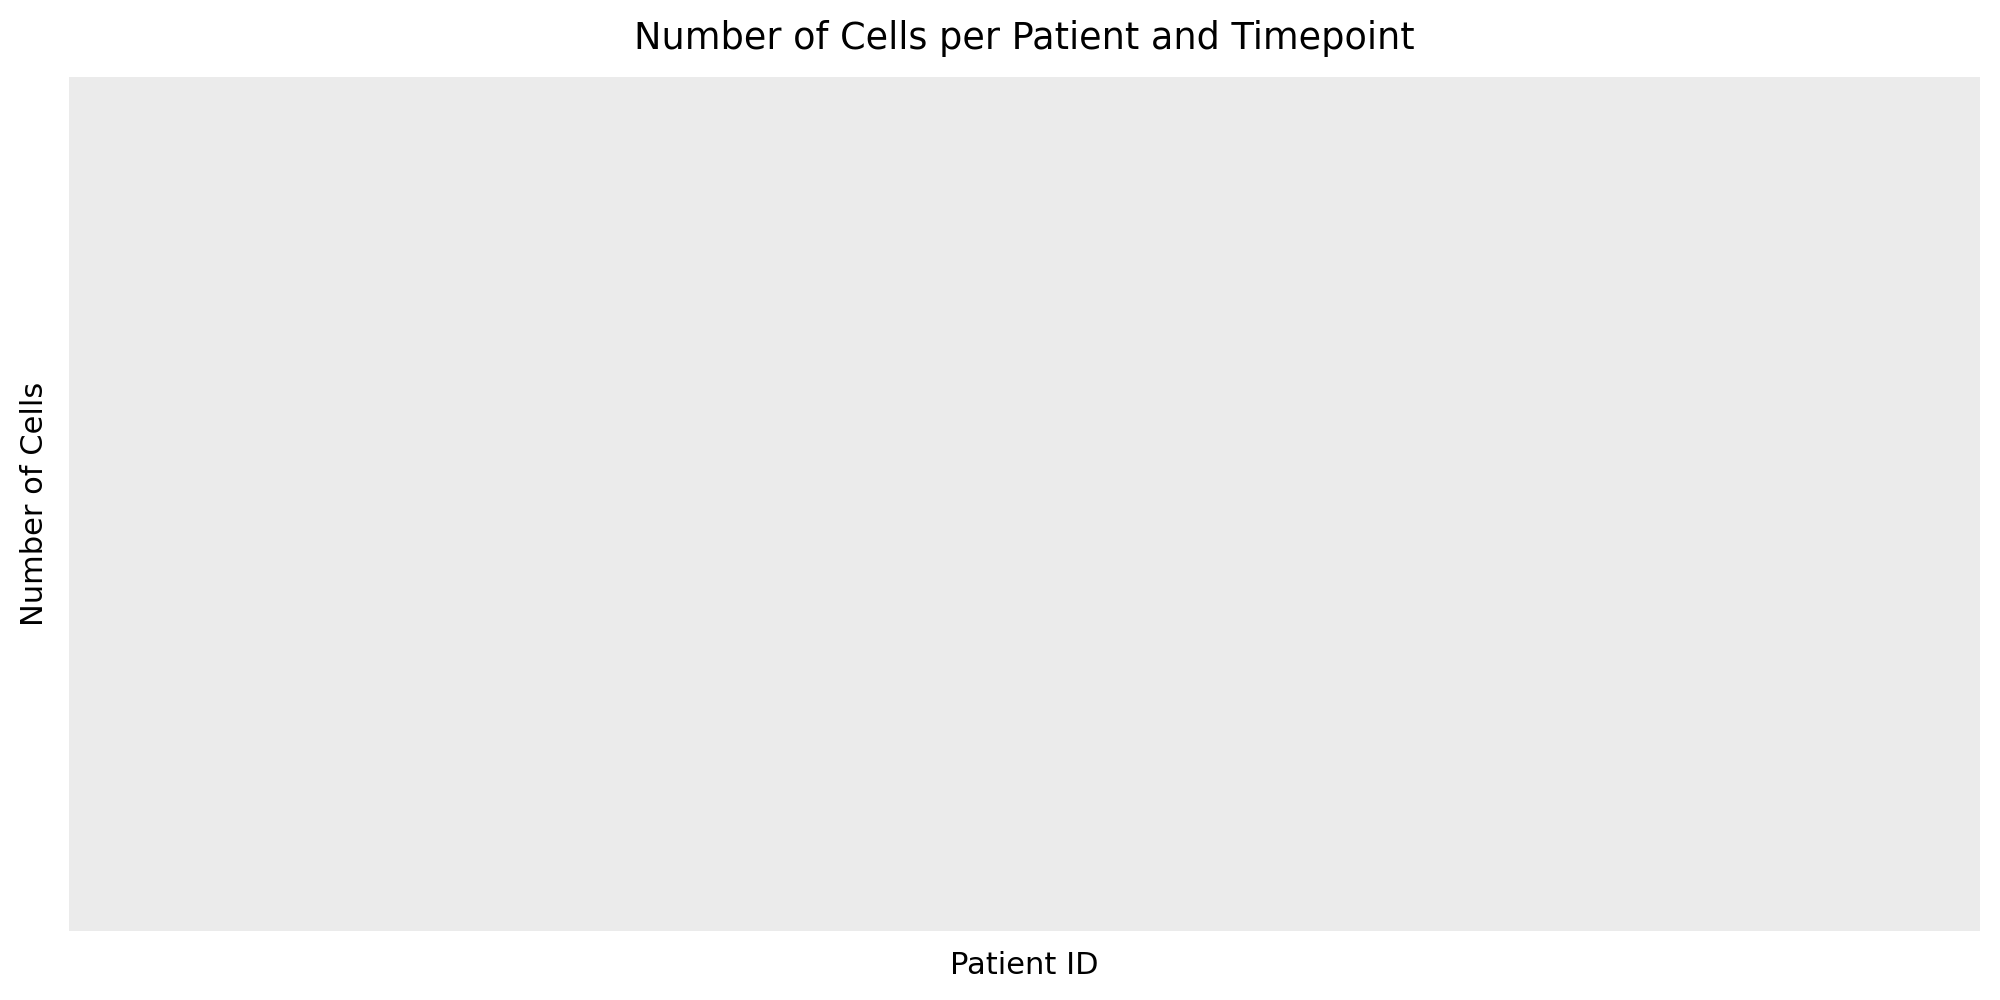

In [28]:
from plotnine import ggplot, aes, geom_bar, theme, element_text, position_dodge

# Assuming 'adata.obs' is a pandas DataFrame with the required columns
# The DataFrame should have 'patient_ID', 'timepoint', and 'experiment_id'

# Create a 'timepoint_label' column to use as the fill aesthetic
adata.obs['timepoint_label'] = 'T' + adata.obs['timepoint'].astype(str)

# Plot
plot = (ggplot(adata.obs, aes(x='patient_ID', fill='timepoint_label'))
        + geom_bar(position=position_dodge(width=0.9))
        + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10, 5))
        + labs(x='Patient ID', y='Number of Cells', fill='Timepoint', title='Number of Cells per Patient and Timepoint'))

# Display the plot
print(plot)


/tmp/ipykernel_2226680/670162413.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 63880 rows containing non-finite values.


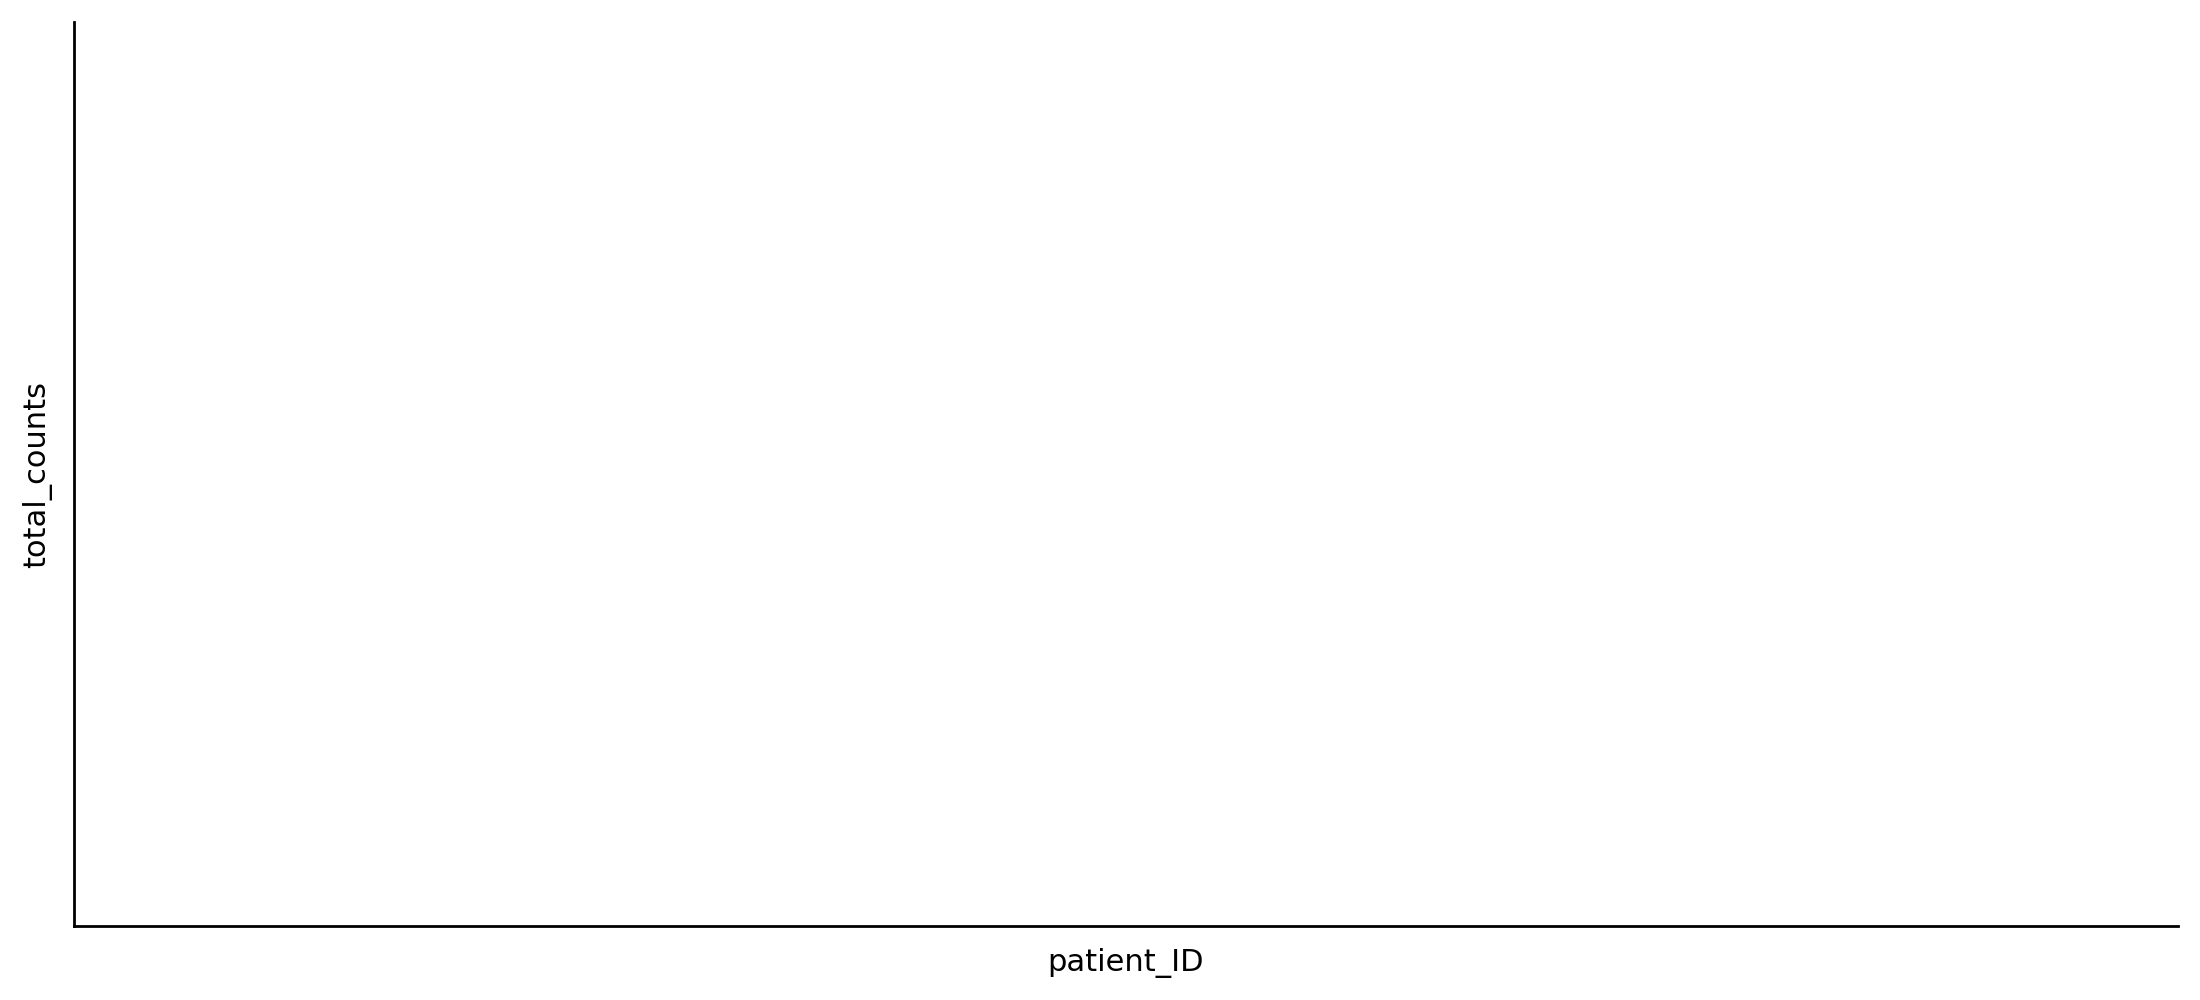

/tmp/ipykernel_2226680/670162413.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 63880 rows containing non-finite values.


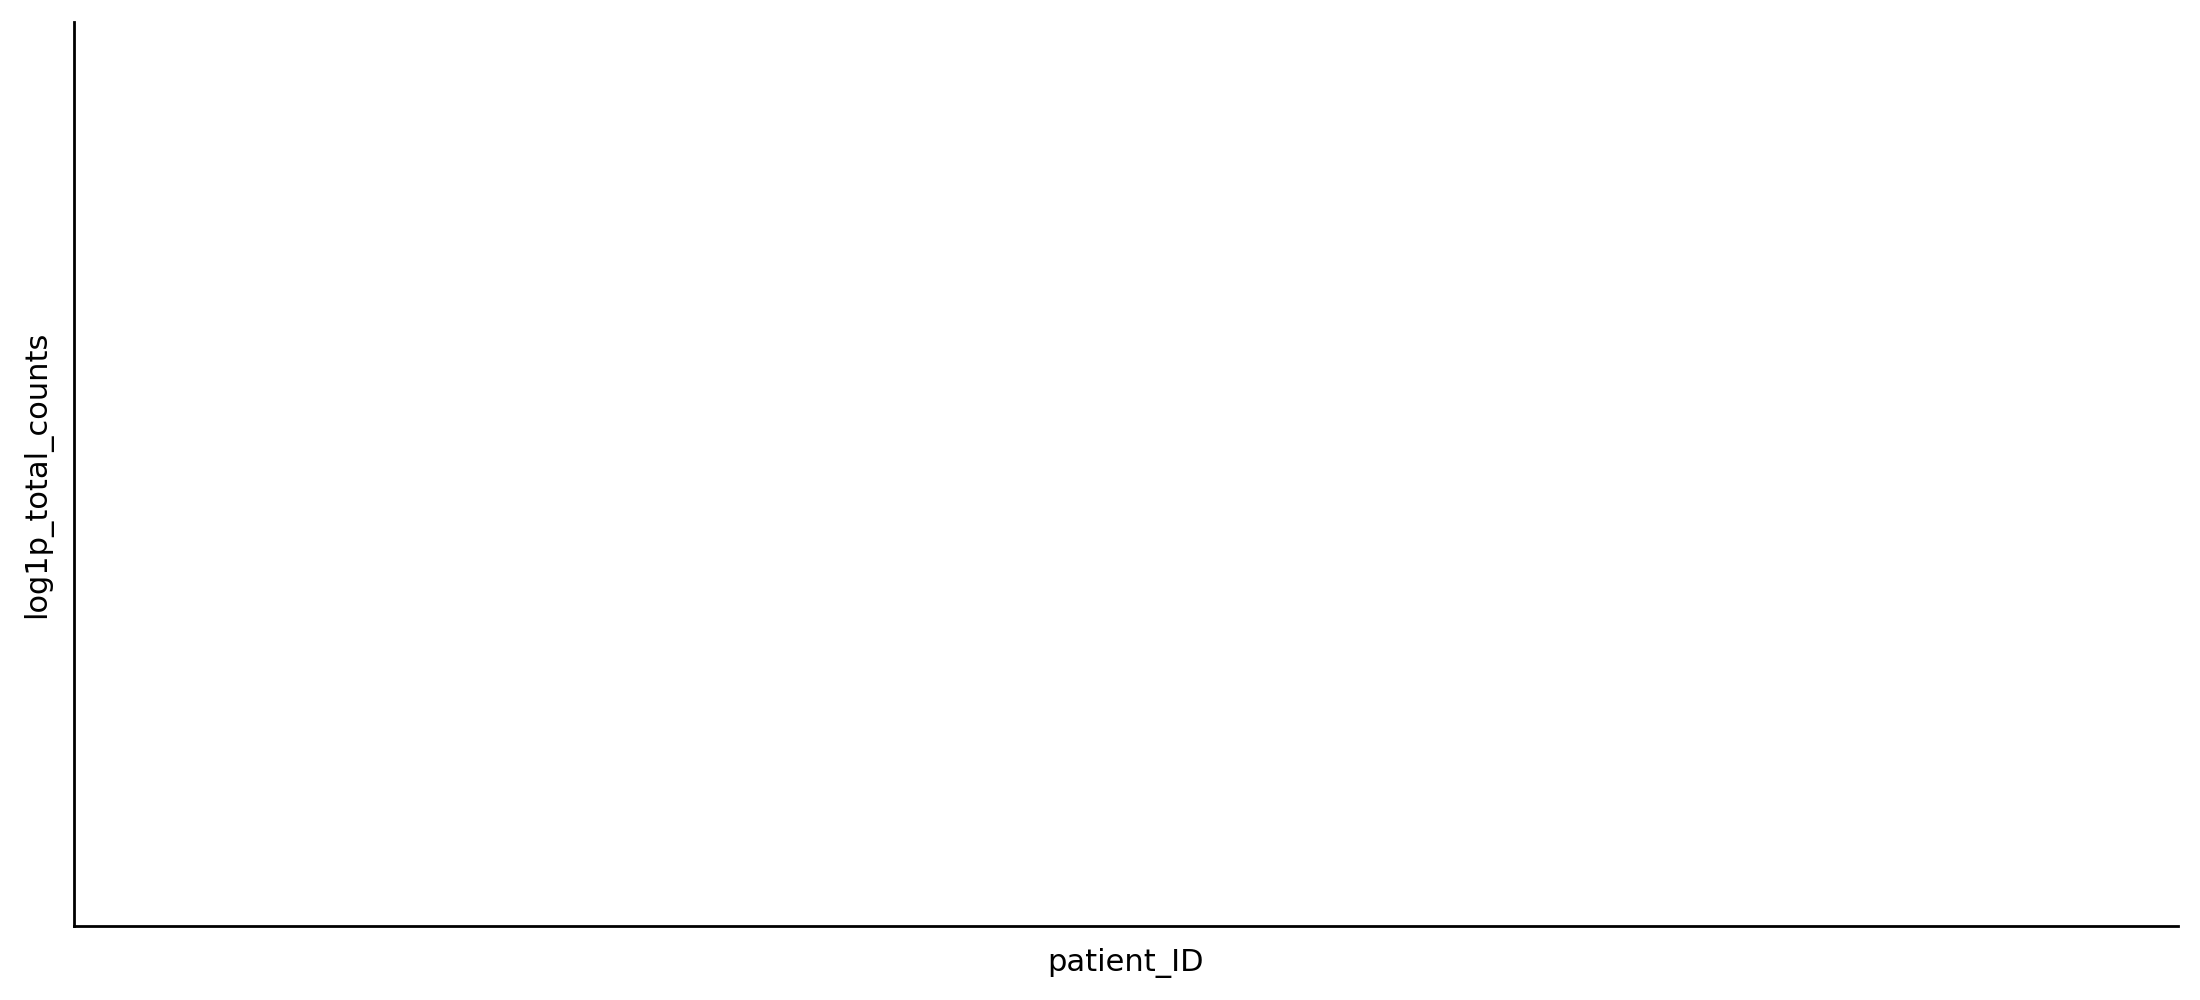

/tmp/ipykernel_2226680/670162413.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 63880 rows containing non-finite values.


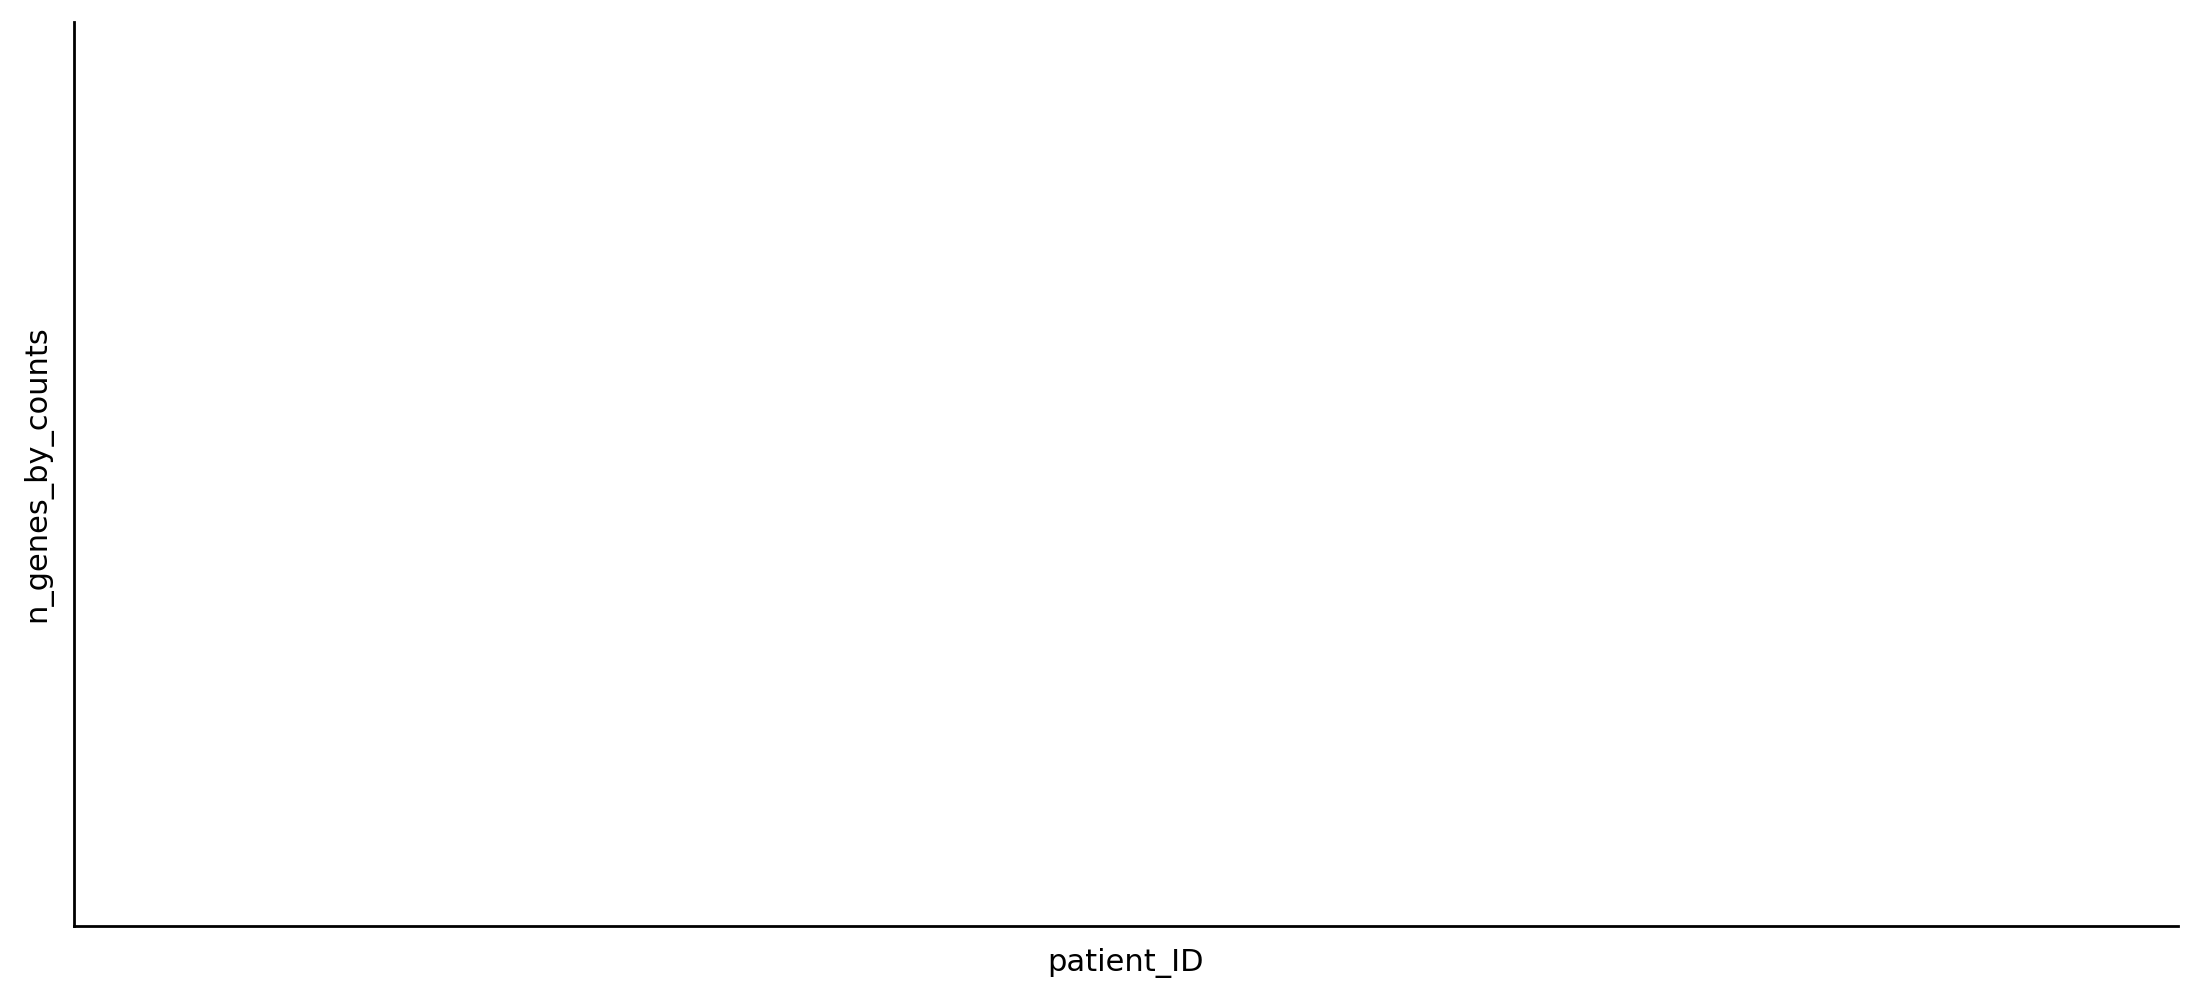

/tmp/ipykernel_2226680/670162413.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 63880 rows containing non-finite values.


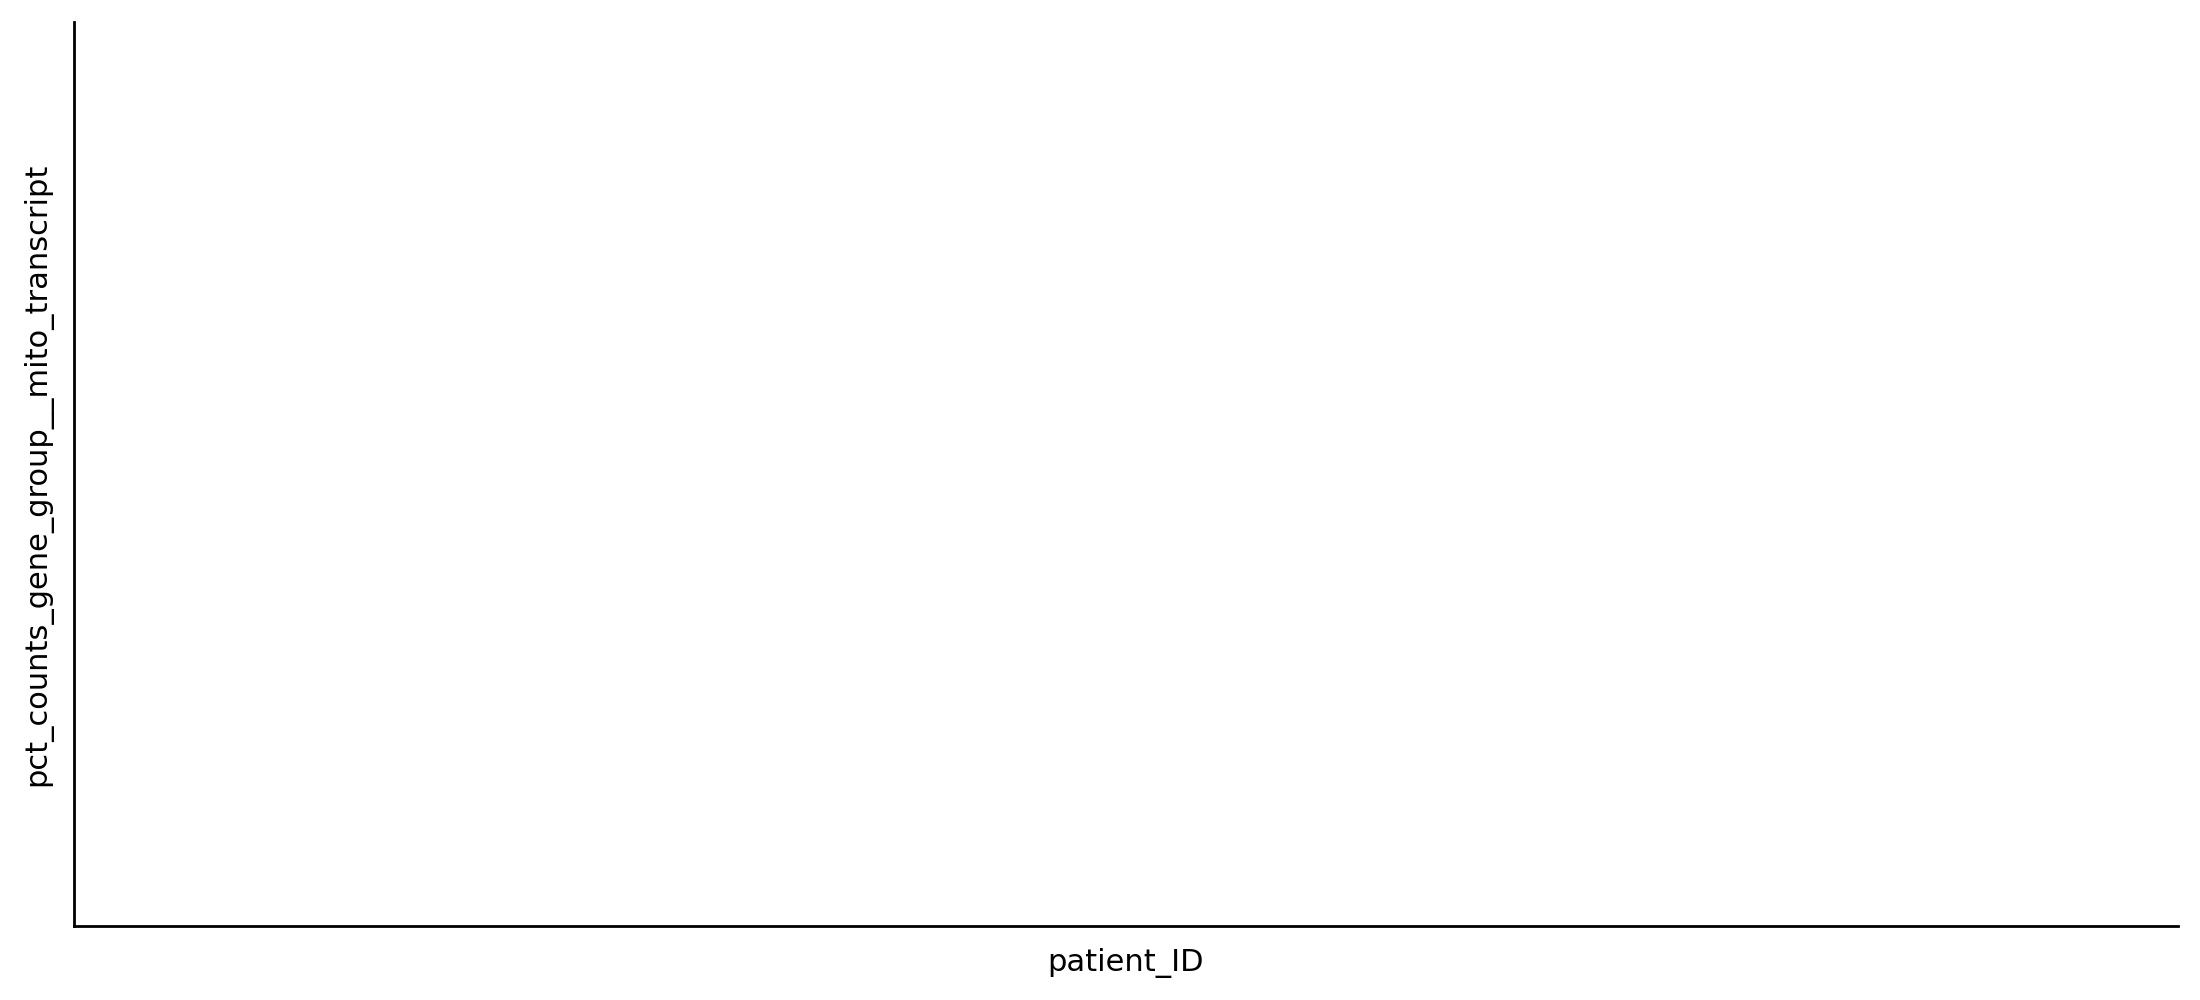

/tmp/ipykernel_2226680/670162413.py:5: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/software/hgi/envs/conda/team152/mt27/test/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_ydensity : Removed 63880 rows containing non-finite values.


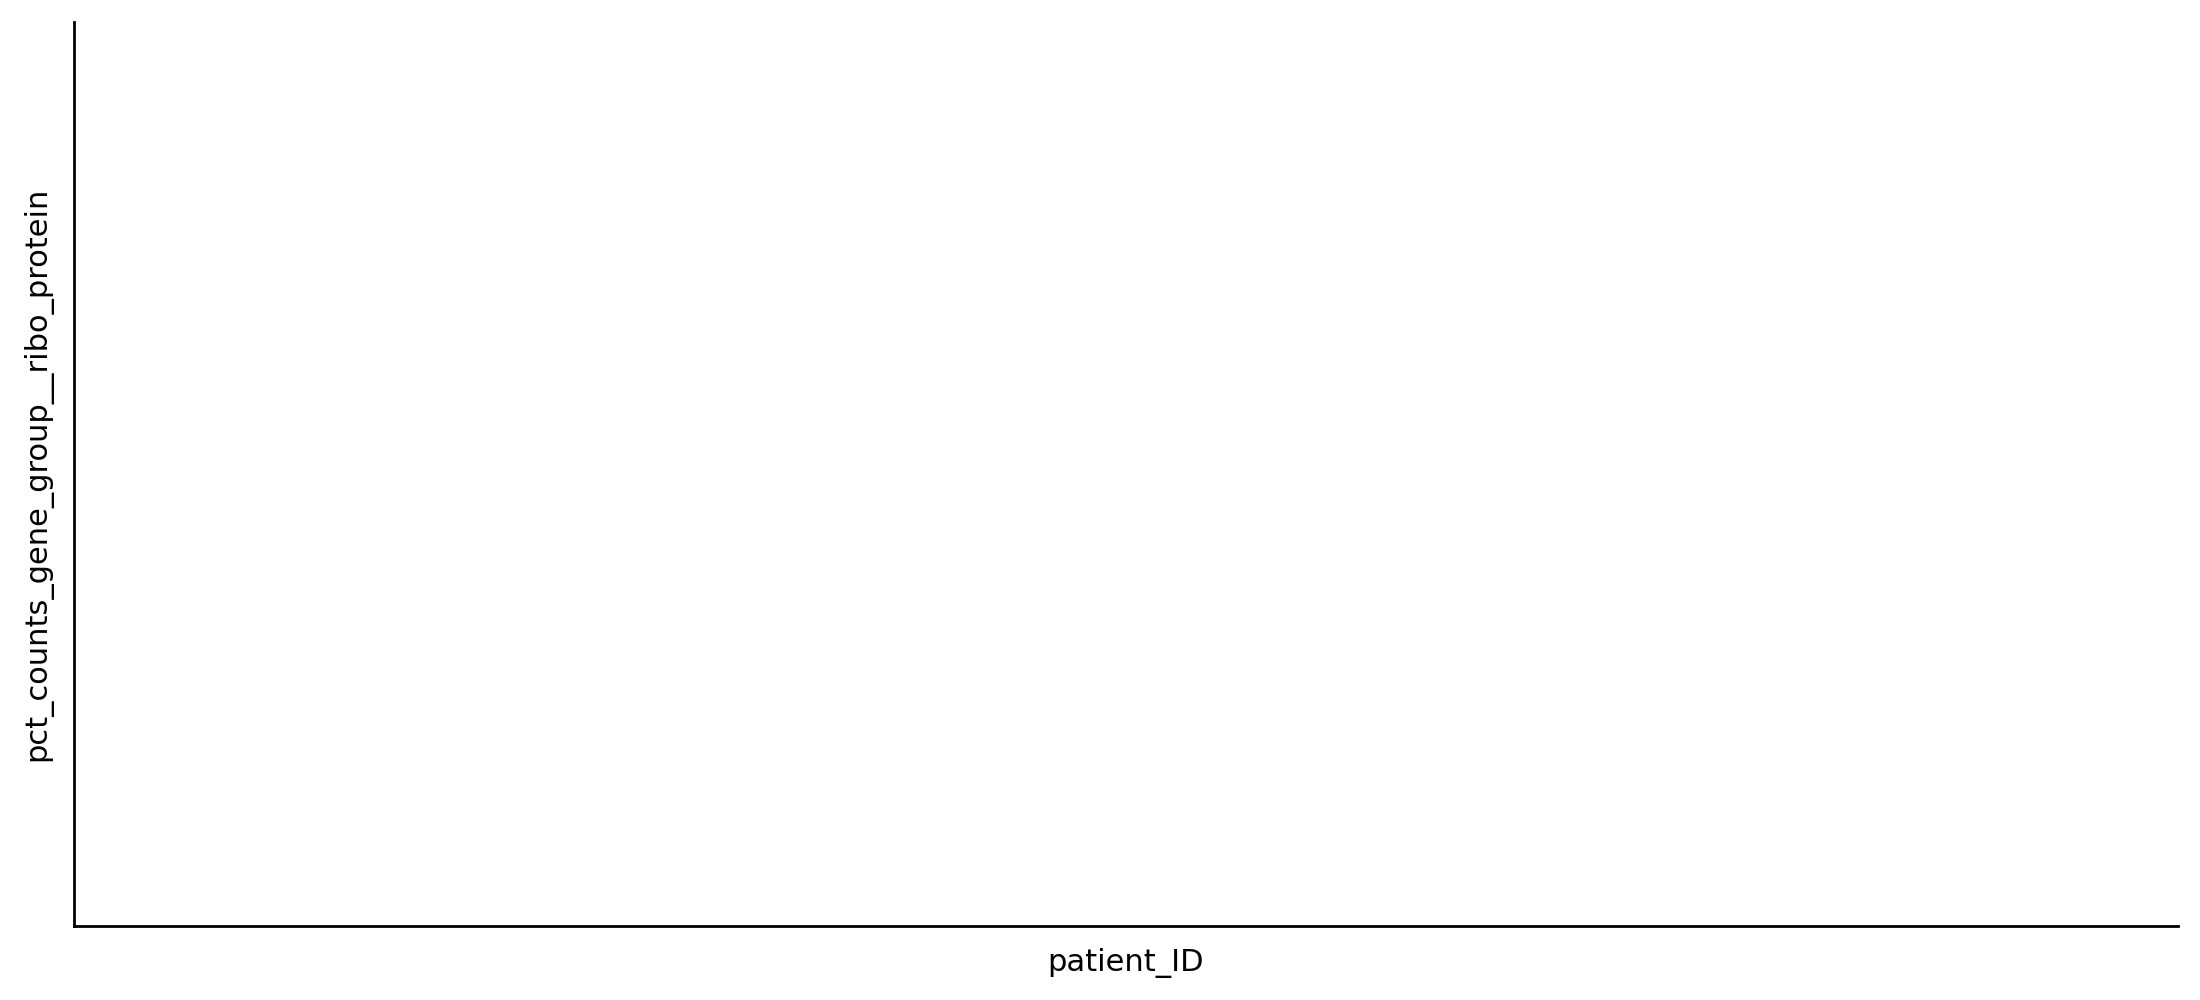

In [22]:
qc_covs = ['total_counts', 'log1p_total_counts', 'n_genes_by_counts','pct_counts_gene_group__mito_transcript', 
            'pct_counts_gene_group__ribo_protein']

for cov in qc_covs:
    print((
        ggplot(adata.obs, aes(x = 'patient_ID', y = cov, fill = 'timepoint')) +
        geom_violin(alpha = 0.6, draw_quantiles = 0.5) +
        theme_classic() +
        theme(figure_size=(11,5), axis_text_x=element_text(angle = 45, hjust = 1))
    ))

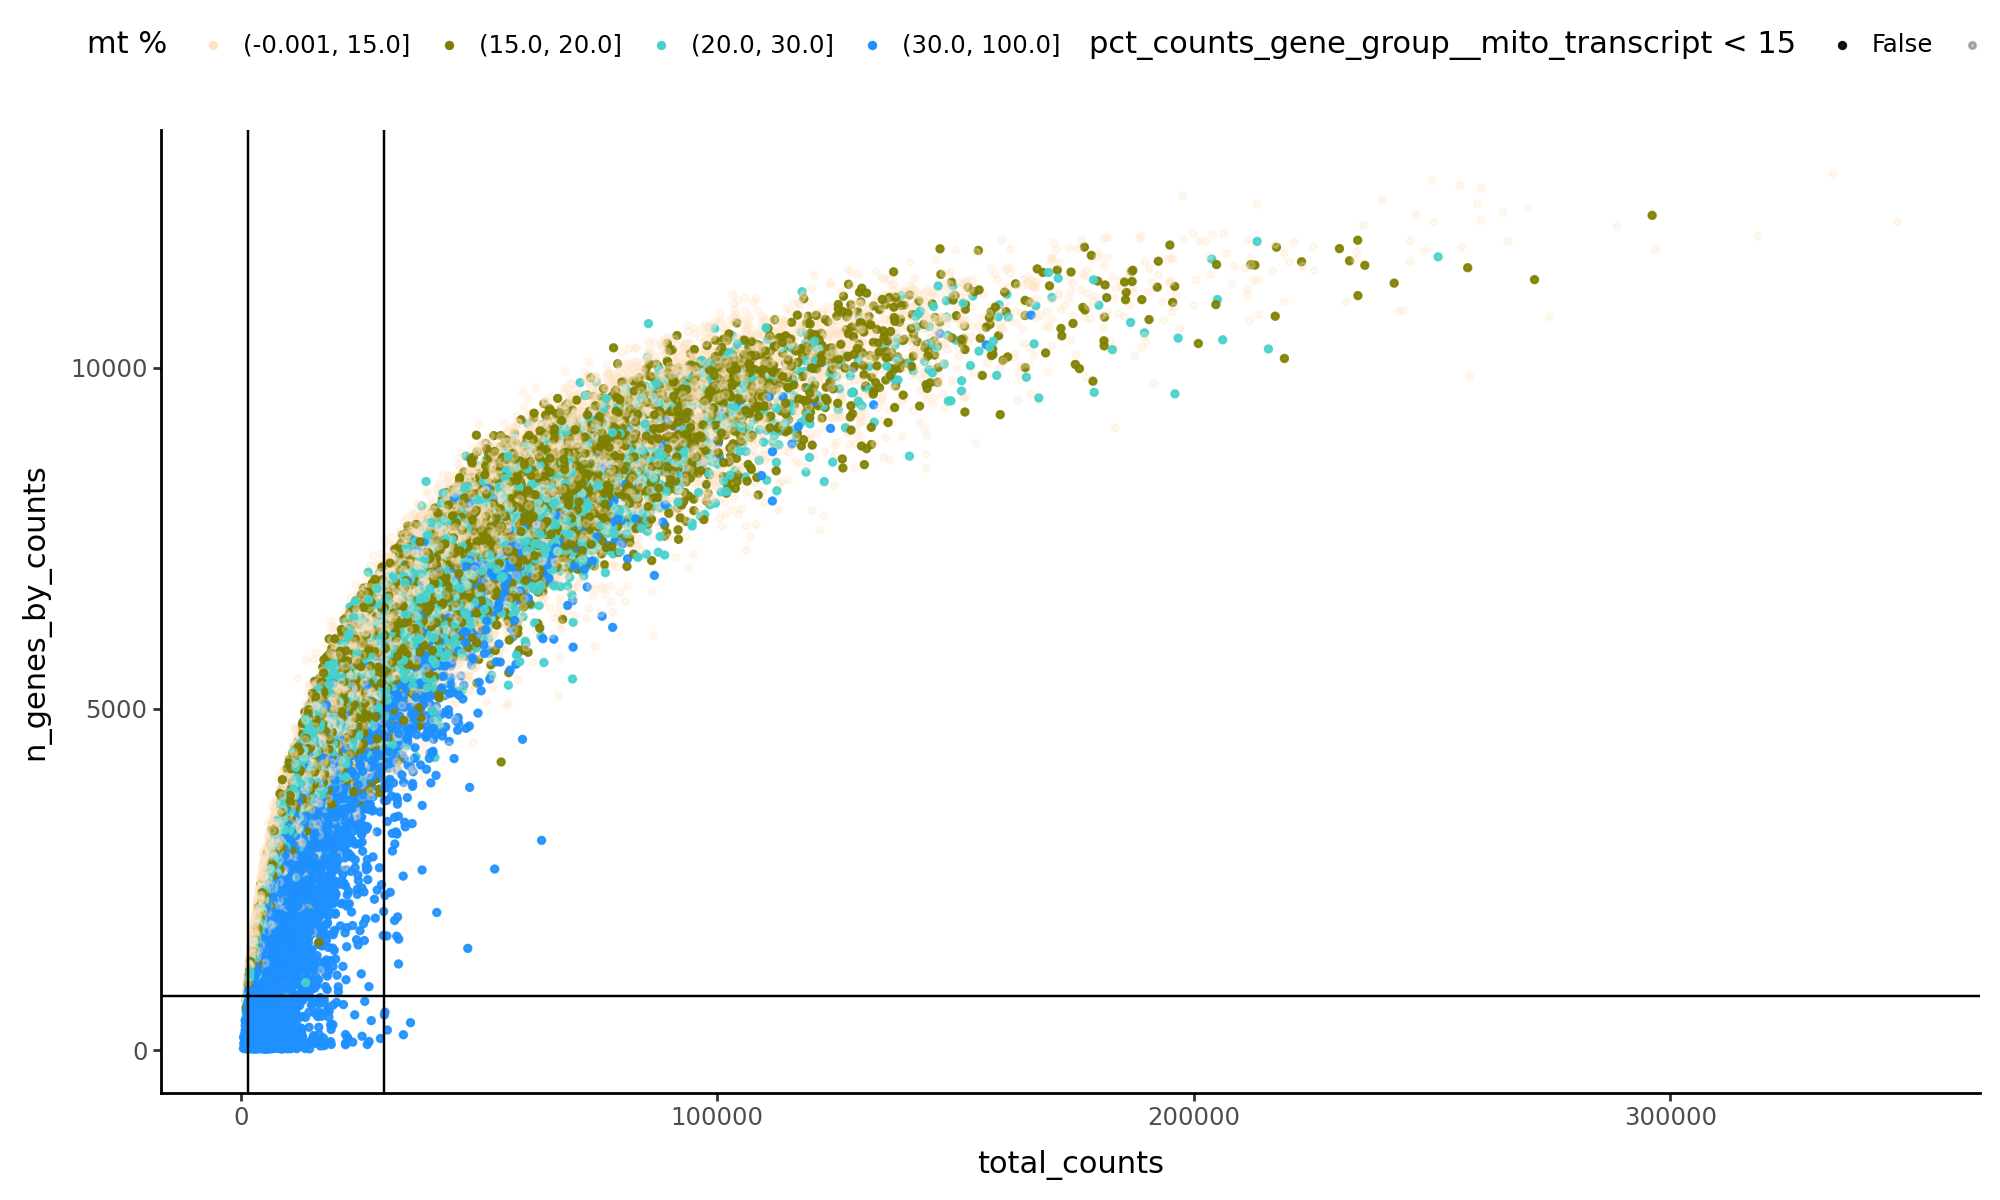

In [23]:
adata.obs.loc[:, 'mt_bins'] = pd.cut(adata.obs['pct_counts_gene_group__mito_transcript'], bins=[0, 15, 20, 30, 100], include_lowest=True)
bin_colors = ['bisque', 'olive', 'mediumturquoise', 'dodgerblue']

(
    ggplot(adata.obs, aes(x='total_counts', y='n_genes_by_counts', color='mt_bins')) +
    geom_point(aes(alpha = 'pct_counts_gene_group__mito_transcript < 15'), size=0.9) +
    theme_classic() +
    geom_vline(xintercept=1500) +
    geom_vline(xintercept=30000) +
    geom_hline(yintercept=800) +
    labs(color='mt %') +
    scale_color_manual(values=bin_colors) +  
    scale_alpha_manual(values = [0.9, 0.25]) + 
    theme(figure_size=(10, 6),  legend_position = 'top')
)

In [24]:
adata.obs.loc[:,'QC'] = np.nan
adata.obs.loc[:,'QC'] = np.where(adata.obs.total_counts != 'blood', np.where(adata.obs.pct_counts_gene_group__mito_transcript < 15 , 
                                                           np.where(adata.obs.total_counts > 30000, 'HighCount', 
                                                                    np.where(np.logical_and(adata.obs.total_counts < 1500, adata.obs.n_genes_by_counts < 800), 
                                                                                    'LowCount', 'Pass')), 'HighMT'), adata.obs.QC)

/tmp/ipykernel_2226680/3271453816.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['HighCount' 'HighCount' 'HighCount' ... 'HighMT' 'HighMT' 'Pass']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


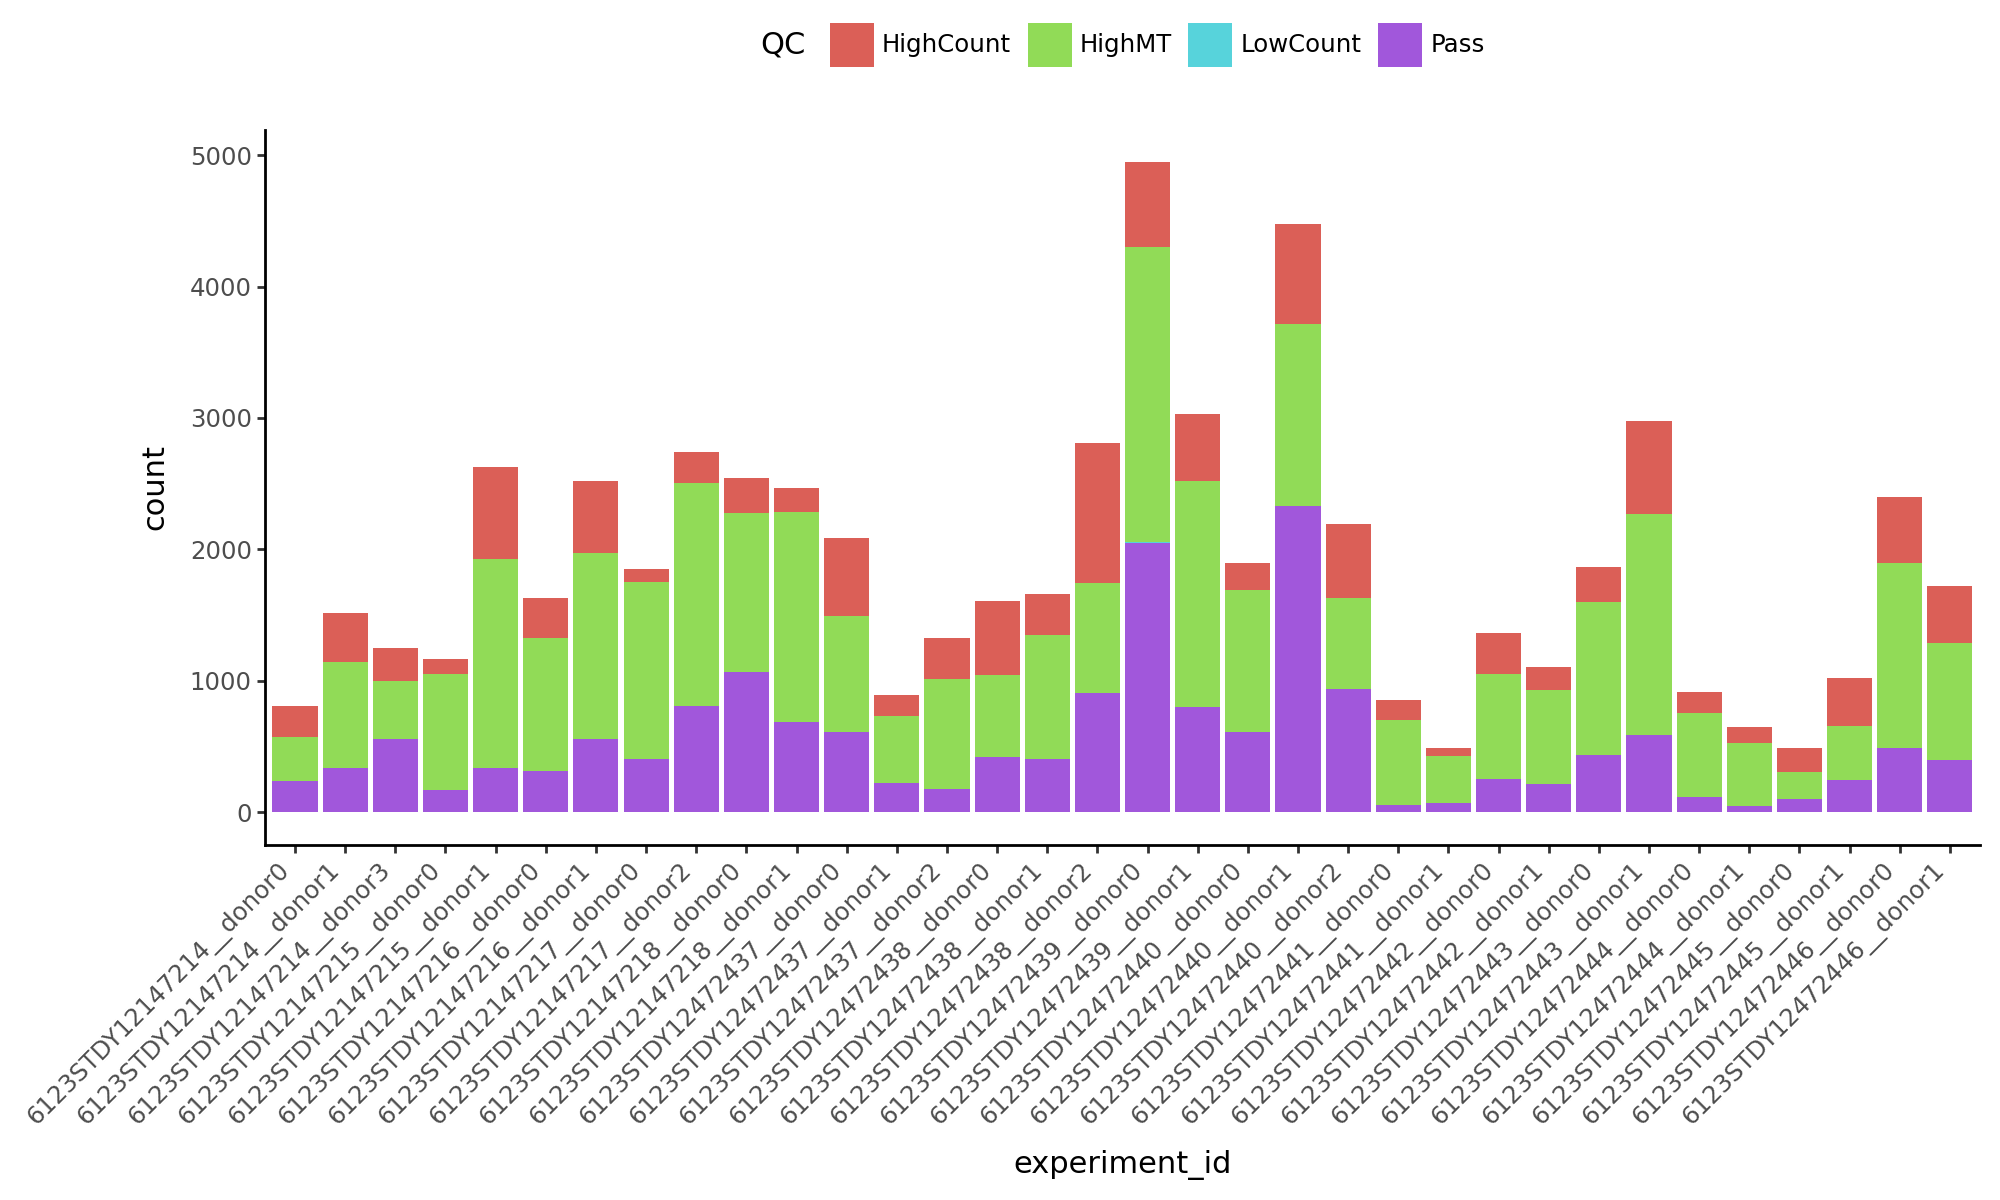

In [25]:
(
    ggplot(adata.obs, aes(x = 'experiment_id', fill = 'QC'))+
    geom_bar() + 
    theme_classic() +
    theme(legend_position= 'top', figure_size=(10, 6), axis_text_x = element_text(angle = 45, hjust = 1))
)

In [26]:
adata.obs.loc[:,'cellID'] = adata.obs_names
adata.obs

,convoluted_samplename,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,experiment_id,n_cells,n_genes_by_counts,...,Keras:predicted_celltype,Keras:predicted_celltype_probability,Donor,Exp,patient_ID,timepoint,timepoint_label,mt_bins,QC,cellID
GTCGCGAAGCCTCGTG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,3.880000e-163,566,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9617,...,Enterocyte_middle_villus_1,0.994251,donor0,6123STDY12147214,NaN,24,T24,"(-0.001, 15.0]",HighCount,GTCGCGAAGCCTCGTG-1-6123STDY12147214__donor0
AGGGCTCCAACACGAG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,8.050000e-130,632,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9665,...,Enterocyte_middle_villus_1,0.929218,donor0,6123STDY12147214,NaN,24,T24,"(-0.001, 15.0]",HighCount,AGGGCTCCAACACGAG-1-6123STDY12147214__donor0
CAACAACGTCCACACG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,1.120000e-131,736,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,10152,...,Enterocyte_middle_villus_1,0.624633,donor0,6123STDY12147214,NaN,24,T24,"(-0.001, 15.0]",HighCount,CAACAACGTCCACACG-1-6123STDY12147214__donor0
ATTCGTTTCCGACATA-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,5.000000e-140,607,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9227,...,Enterocyte_middle_villus_1,0.932969,donor0,6123STDY12147214,NaN,24,T24,"(-0.001, 15.0]",HighCount,ATTCGTTTCCGACATA-1-6123STDY12147214__donor0
TTACGCCTCACCATAG-1-6123STDY12147214__donor0,6123STDY12147214,donor0,1.000,2.070000e-61,656,3981576796726,"donor0,donor1",6123STDY12147214__donor0,810,9955,...,Enterocyte_middle_villus_1,0.366350,donor0,6123STDY12147214,NaN,24,T24,"(-0.001, 15.0]",HighCount,TTACGCCTCACCATAG-1-6123STDY12147214__donor0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCATTGTCCGATCTC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.970,2.980000e-02,10,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,955,...,Enterocytes_BEST4,0.895111,donor1,6123STDY12472446,NaN,24,T24,"(15.0, 20.0]",HighMT,TTCATTGTCCGATCTC-1-6123STDY12472446__donor1
TTCATGTGTACCTAAC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.985,1.540000e-02,11,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,370,...,B_cell_plasma_IgA_1,0.873793,donor1,6123STDY12472446,NaN,24,T24,"(30.0, 100.0]",HighMT,TTCATGTGTACCTAAC-1-6123STDY12472446__donor1
CGATGGCAGGGAGGCA-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.986,1.430000e-02,14,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,893,...,B_cell_plasma_IgA_1,0.585986,donor1,6123STDY12472446,NaN,24,T24,"(30.0, 100.0]",HighMT,CGATGGCAGGGAGGCA-1-6123STDY12472446__donor1
TTCCTAAAGCGCGTTC-1-6123STDY12472446__donor1,6123STDY12472446,donor1,0.941,5.860000e-02,15,donor1,"donor0,donor1",6123STDY12472446__donor1,1719,610,...,B_cell_plasma_IgA_1,0.621398,donor1,6123STDY12472446,NaN,24,T24,"(30.0, 100.0]",HighMT,TTCCTAAAGCGCGTTC-1-6123STDY12472446__donor1


In [27]:
df = adata.obs[['cellID', 'patient_ID', 'QC', 'timepoint']]
#df = adata.obs[['cellID', 'patient_ID', 'QC', 'timepoint']].pivot(index=['cellID', 'patient_ID'], columns='timepoint')
#df.columns = [f"{col[0]}_{col[1]}" for col in df.columns]
#df = df.reset_index()
#df = df.loc[~np.logical_or(df.QC_24.isnull(), df.QC_48.isnull()), :]
#(df.QC_24 != df.QC_48).value_counts()